## Machine Learning - Ex.8


Submitted by: [**enter your name/s**]

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## PCA


Implement the PCA algorithm as presented in class.

**Input:**


1) a matrix `X` of size $n\times d$ (representing $n$ samples in $d$-dimensions) 

2) a parameter `k` $(k\leq d)$` (the output dimension).

**Output:**


1) a matrix ```Z``` of size $n\times k$ (the reduced representation of the data)

2) a matrix ```U``` of size $d\times k$ (with the $k$ eigenvectors as its coloumns)

3) a vector ```evls``` of size $k$ (with the corresponding $k$ eigenvalues)


hint: use `numpy.linalg.eig` function 



In [2]:
def PCA(X,k):
    # your code here.. 
    n,d = X.shape
    if (k==d):
        return X, 0, 0
    elif (k>d):
        print('Dimensions of X are less than that of the value of k')
        return 0,0,0
    else:
        for i in range(d):
            X[:,i] = X[:,i] - (np.mean(X[:,i]))
        C_X = np.cov(X.T)
        EvalueC, EvectorC = np.linalg.eig(C_X)
        eig_pairs = [(np.abs(EvalueC[i]), EvectorC[:,i]) for i in range(len(EvalueC))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        evls = np.array([])
        for i in range(k):
            evls = np.append(evls, eig_pairs[i][0].reshape(1),axis=0)
        U = np.zeros(shape=(d,1))
        for i in range(d):
            U = np.append(U, eig_pairs[i][1].reshape(d,1), axis=1)
        U = U[:,1:k+1]
        Z = X.dot(U)
    return Z, U, evls
    

###  20-D data

Lets load the 20-D dataset:





data.shape =  (180, 20)


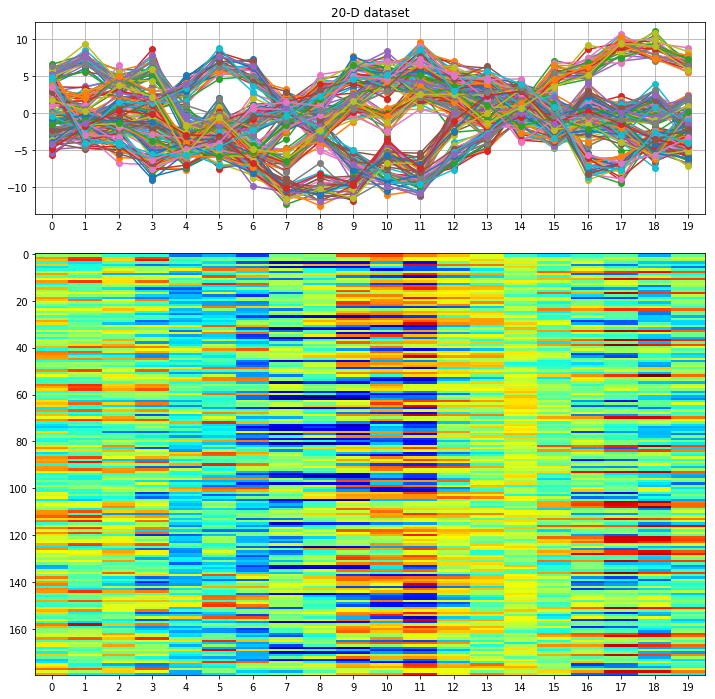

In [3]:
data = np.loadtxt('ex8_data.csv', delimiter=',')

print('data.shape = ',data.shape)
n,d = data.shape
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.plot(data.T,'o-')
plt.title('20-D dataset')
plt.xticks(np.arange(20))
plt.xlim([-0.5,19.5])
plt.grid()

plt.subplot(3,1,(2,3))
plt.imshow(data,cmap=plt.cm.jet)
plt.xticks(np.arange(20))
plt.axis('normal')
plt.show()

Use PCA to project the 20-D data into a 2-D subspace.
- **Does the projection capture the underlying structure of the data?**
  Yes, it does capture the underlying structure by calculating the variance of each PCA component.
- Next, try projecting it to 3-D as well. 

For 3D visualization see:


 https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html



After PCA for 2D shape of data =  (180, 2)


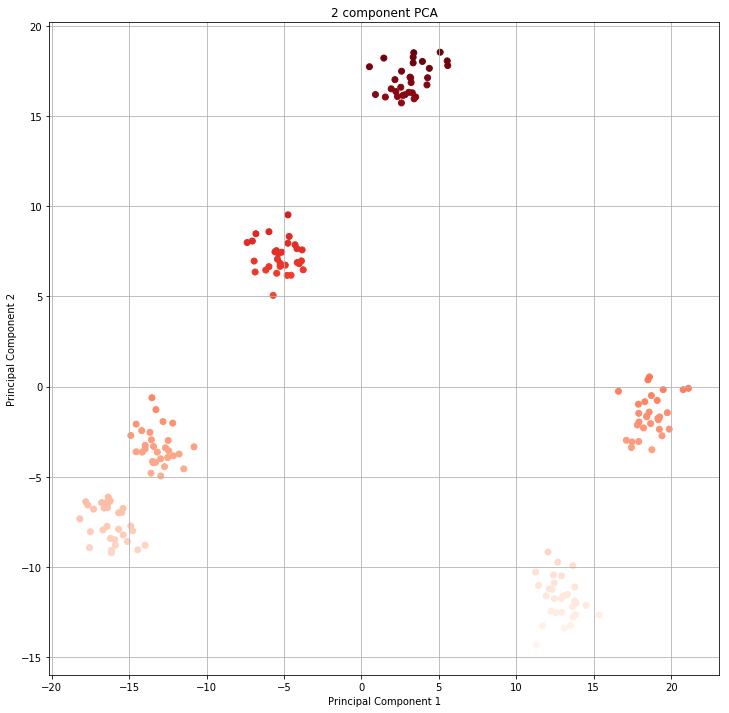

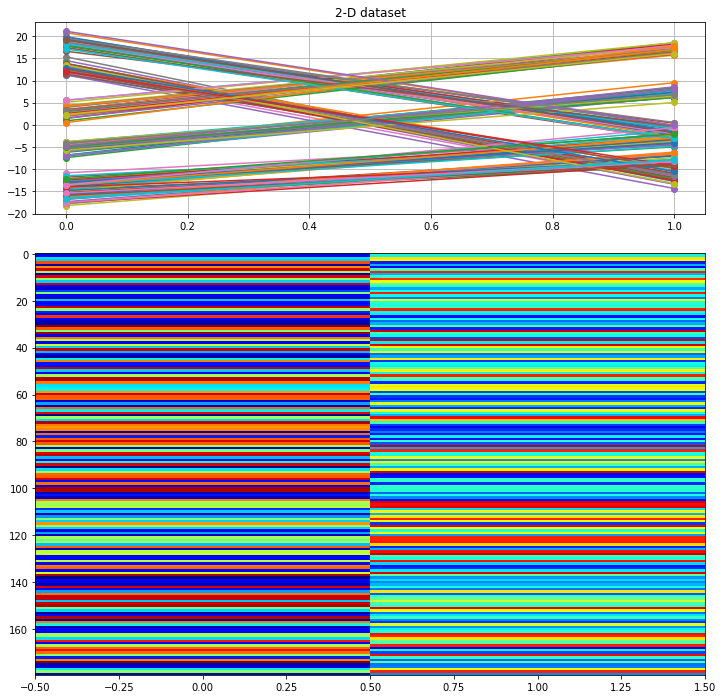

After PCA for 3D shape of data =  (180, 3)


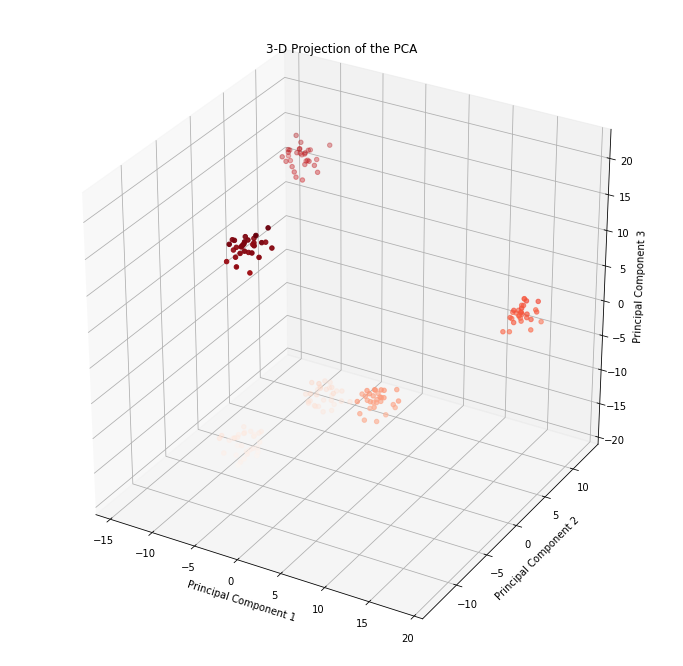

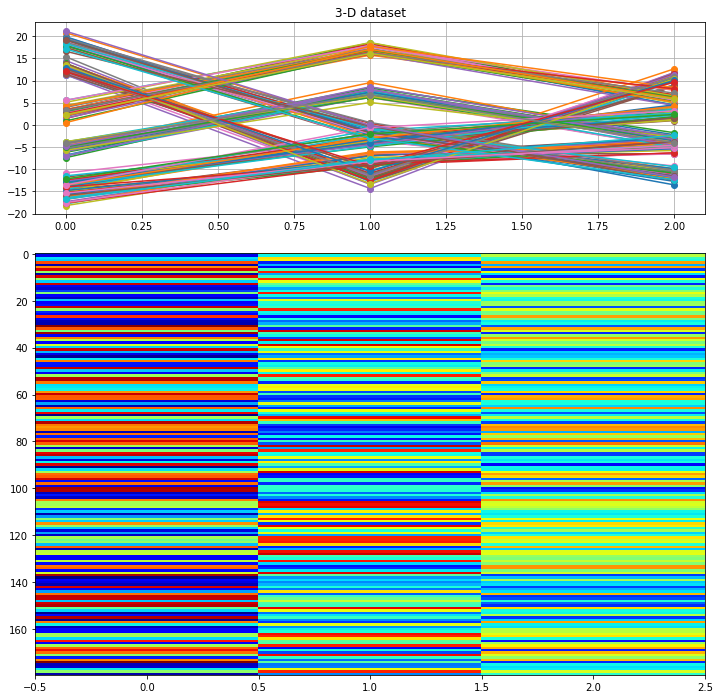

In [9]:
# your code here.. 
Z2,U,evls=PCA(data,2)
Z3,U,evls=PCA(data,3)

print('After PCA for 2D shape of data = ',Z2.shape)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
colors = ['r', 'g', 'b']
ax.scatter(Z2[:,0], Z2[:,1], c=Z2[:,1], cmap='Reds')
ax.grid()

n,d = Z3.shape

plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.plot(Z2.T,'o-')
plt.title('2-D dataset')
#plt.xticks(np.arange(20))
#plt.xlim([-0.5,19.5])
plt.grid()

plt.subplot(3,1,(2,3))
plt.imshow(Z2,cmap=plt.cm.jet)
#plt.xticks(np.arange(20))
plt.axis('normal')
plt.show()

print('After PCA for 3D shape of data = ',Z3.shape)
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
plt.title('3-D Projection of the PCA')
zdata = Z3[:,0]
xdata = Z3[:,1]
ydata = Z3[:,2]
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');
n,d = Z3.shape

plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.plot(Z3.T,'o-')
plt.title('3-D dataset')
#plt.xticks(np.arange(20))
#plt.xlim([-0.5,19.5])
plt.grid()

plt.subplot(3,1,(2,3))
plt.imshow(Z3,cmap=plt.cm.jet)
#plt.xticks(np.arange(20))
plt.axis('normal')
plt.show()

- Calculate and plot all the **20 eigenvalues** $\lambda_j$ of the PCA
- How much of the variability the projection to 2-D captures? (**100%**)
- How much of the variability the projection to 3-D captures? (**100%**)

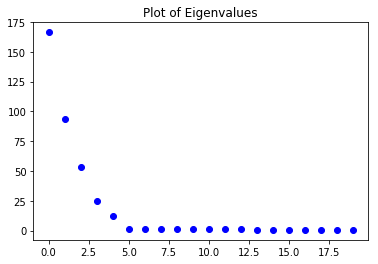

20 eigenvalues of the PCA are = [166.31583383  93.28174737  53.02601951  25.17240755  12.31611675
   1.54213938   1.44557283   1.36409612   1.26784844   1.1908744
   1.07724837   1.0532086    0.95657214   0.91457197   0.84295663
   0.78236681   0.74754868   0.67419304   0.64382466   0.57491063]
Variability of the principal components for 2-D = [0.64066789 0.35933211] that adds to =  1.0
Variability of the principal components for 2-D = [0.53200025 0.29838357 0.16961618] that adds to =  0.9999999999999999


In [7]:
# your code here.. 
n,d = data.shape 
X= data
for i in range(d):
    X[:,i] = X[:,i] - (np.mean(X[:,i]))
C_X = np.cov(X.T)
EvalueC, EvectorC = np.linalg.eig(C_X)
eig_pairs = [(np.abs(EvalueC[i]), EvectorC[:,i]) for i in range(len(EvalueC))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
evls = np.array([])
for i in range(d):
    evls = np.append(evls, eig_pairs[i][0].reshape(1),axis=0)
def plot_data(X, ax):
    ax.plot(X, 'bo') 
    plt.title('Plot of Eigenvalues')
fig, ax = plt.subplots()
plot_data(evls, ax)
plt.show()
print('20 eigenvalues of the PCA are =' ,evls)
ex_variance = np.var(Z2,axis=0)
ex_variance_ratio = (ex_variance)/(np.sum(ex_variance))
print('Variability of the principal components for 2-D =',ex_variance_ratio, 'that adds to = ',np.sum(ex_variance_ratio))
ex_variance = np.var(Z3,axis=0)
ex_variance_ratio = (ex_variance)/(np.sum(ex_variance))
print('Variability of the principal components for 2-D =',ex_variance_ratio, 'that adds to = ',np.sum(ex_variance_ratio))


Use your `k-means` code from Ex.7 to cluster the dataset (`k=?`)

Sort and color the dataset accordingly (one color for each cluster) and visulaize the results.

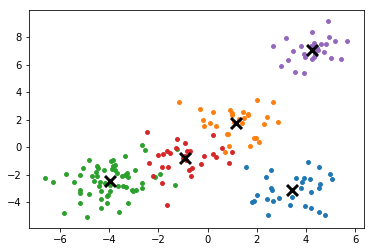

In [90]:
# your code here.. 
def kmean(X, K):
    
    # your code here..
    
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    #random initialization of centroids
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m),:]
 
    for f in range(50):
            idx = np.zeros((X.shape[0],1))
            temp = np.zeros((centroids.shape[0],1))


            for i in range(X.shape[0]):
                for j in range(K):
                    dist = X[i,:] - centroids[j,:]
                    length = np.sum(dist**2)
                    temp[j] = length
                idx[i] = np.argmin(temp)+1
                
            #calculate J (cost)
            J=0
            for i in range(m):
                index = int((idx[i]-1)[0])
                J = J + (np.linalg.norm(X[i]-centroids[index]) ** 2)
            
            
            #updating centroid
            centroid_mean = np.zeros((K,n))
            count = np.zeros((K,1))

            for i in range(m):
                index = int((idx[i]-1)[0])
                centroid_mean[index,:]+=X[i,:]
                count[index]+=1


            C=centroid_mean/count
            centroids=C
    
    
    
    
    
    
    return  idx,C, J
K=5
X=data

y, C, J=kmean(X, K)

#color=["red", "blue", "green", "orange"]
for k in range(1,K+1):
    grp = (y==k).reshape(data.shape[0],1)
    plt.scatter(X[grp[:,0],0],X[grp[:,0],1],cmap=plt.cm.rainbow,s=15)
    
plt.scatter(C[:,0],C[:,1],s=120,marker="x",c="black",linewidth=3)


## Good luck !